<a href="https://colab.research.google.com/github/NicholasDarwin/Cell-Image-Classification/blob/main/Cell_Image_Classification_with_Neural_Networks_using_TensorFlow_and_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount google Drive Folder:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**View first files:** (to check if files have loaded in properly)

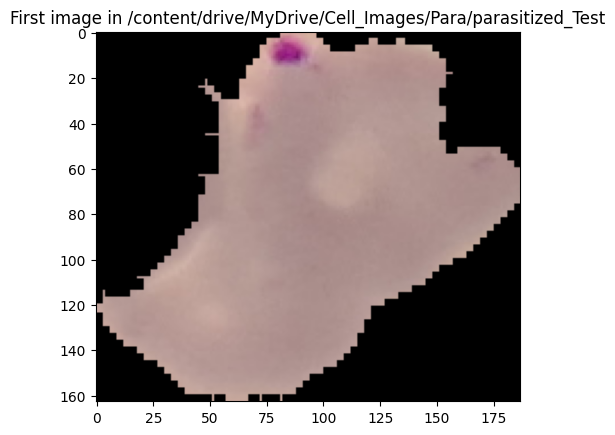

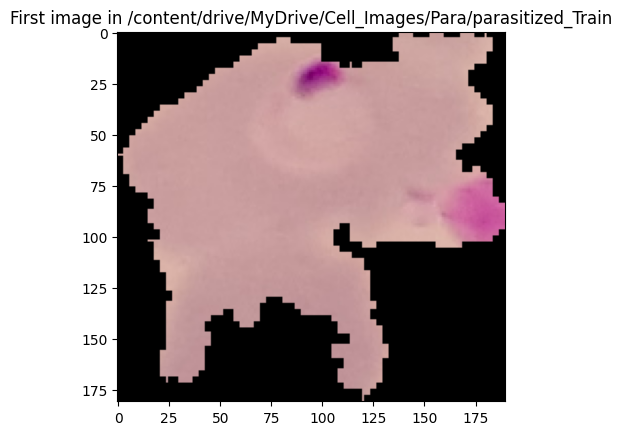

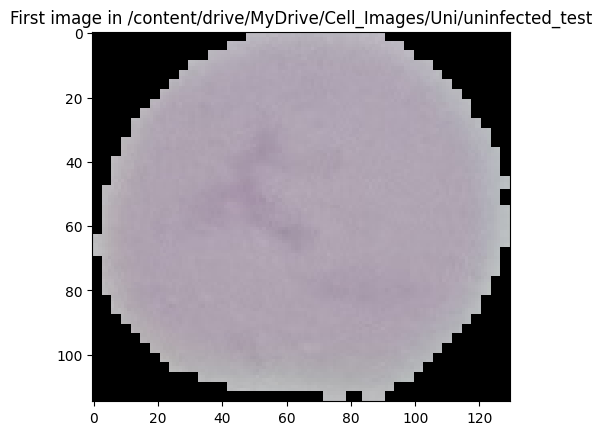

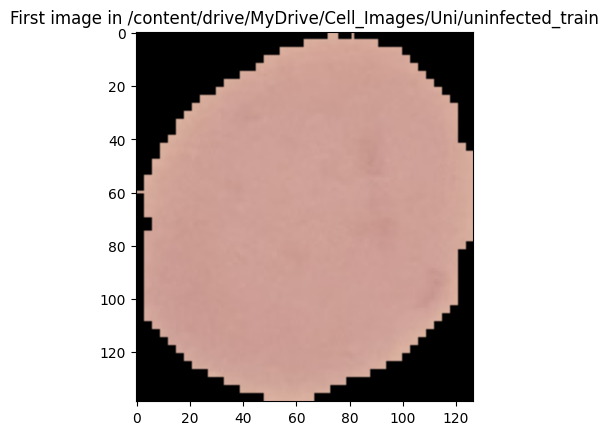

In [ ]:
# first 4 immages in python
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define file paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
parasitized_train_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Train'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'
uninfected_train_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_train'

# Function to display the first image in a folder
def display_first_image(folder_path):
    files = os.listdir(folder_path)
    if files:
        first_image_path = os.path.join(folder_path, files[0])
        image = Image.open(first_image_path)
        plt.imshow(image)
        plt.title(f"First image in {folder_path}")
        plt.show()

# Display the first image in each folder
display_first_image(parasitized_test_path)
display_first_image(parasitized_train_path)
display_first_image(uninfected_test_path)
display_first_image(uninfected_train_path)


**ACCURACY TESTER:**

In [ ]:
import os
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = '/content/drive/MyDrive/Cell_Images/newTester4k(final).h5'
model = tf.keras.models.load_model(model_path)

# Test paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'

# Function to load test images and labels
def load_test_data(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load test data for parasitized images
parasitized_images_test, parasitized_labels_test = load_test_data(parasitized_test_path, 1)

# Load test data for uninfected images
uninfected_images_test, uninfected_labels_test = load_test_data(uninfected_test_path, 0)

# Normalize pixel values to be between 0 and 1
parasitized_images_test = parasitized_images_test / 255.0
uninfected_images_test = uninfected_images_test / 255.0

# Evaluate the model on the test data for parasitized images
test_loss_parasitized, test_acc_parasitized = model.evaluate(parasitized_images_test, parasitized_labels_test)

# Evaluate the model on the test data for uninfected images
test_loss_uninfected, test_acc_uninfected = model.evaluate(uninfected_images_test, uninfected_labels_test)

# Display the results
print(f"Model Path: {model_path}")
print(f"Accuracy on Parasitized Test Images: {test_acc_parasitized * 100:.2f}%")
print(f"Accuracy on Uninfected Test Images: {test_acc_uninfected * 100:.2f}%")


**TRAINER:**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set the variable for the number of photos taken from each train file
num_photos_per_class = 2000  # Change this value as needed

# File paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
parasitized_train_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Train'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'
uninfected_train_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_train'


# Function to load images from the specified directory
def load_images(directory, num_photos):
    images = []
    for filename in os.listdir(directory)[:num_photos]:
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Load parasitized and uninfected cell images
parasitized_images_train = load_images(parasitized_train_path, num_photos_per_class)
uninfected_images_train = load_images(uninfected_train_path, num_photos_per_class)

# Normalize pixel values
parasitized_images_train /= 255.0
uninfected_images_train /= 255.0

# Create labels for the images (1 for parasitized, 0 for uninfected)
labels = np.concatenate([np.ones(num_photos_per_class), np.zeros(num_photos_per_class)])

# Combine images and labels for training data
X_train = np.concatenate([parasitized_images_train, uninfected_images_train])
y_train = labels

# Shuffle the data
shuffle_indices = np.arange(X_train.shape[0])
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_idx = int(len(X_train) * split_ratio)

X_validation = X_train[split_idx:]
y_validation = y_train[split_idx:]

X_train = X_train[:split_idx]
y_train = y_train[:split_idx]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Define the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

# Train the model
epochs = 10
batch_size = 25

model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('/content/drive/MyDrive/Cell_Images/newTester.h5')

In [ ]:
import os
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = '/content/drive/MyDrive/Cell_Images/newTester10k.h5'
model = tf.keras.models.load_model(model_path)

# Test paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'

# Function to load test images and labels
def load_test_data(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)
,8
# Load test data for parasitized images
parasitized_images_test, parasitized_labels_test = load_test_data(parasitized_test_path, 1)

# Load test data for uninfected images
uninfected_images_test, uninfected_labels_test = load_test_data(uninfected_test_path, 0)

# Normalize pixel values to be between 0 and 1
parasitized_images_test = parasitized_images_test / 255.0
uninfected_images_test = uninfected_images_test / 255.0

# Evaluate the model on the test data for parasitized images
test_loss_parasitized, test_acc_parasitized = model.evaluate(parasitized_images_test, parasitized_labels_test)

# Evaluate the model on the test data for uninfected images
test_loss_uninfected, test_acc_uninfected = model.evaluate(uninfected_images_test, uninfected_labels_test)

# Display the results
print(f"Model Path: {model_path}")
print(f"Accuracy on Parasitized Test Images: {test_acc_parasitized * 100:.2f}%")
print(f"Accuracy on Uninfected Test Images: {test_acc_uninfected * 100:.2f}%")


47/47 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9847
Model Path: /content/drive/MyDrive/Cell_Images/newTester4k.h5
Accuracy on Parasitized Test Images: 86.73%
Accuracy on Uninfected Test Images: 98.47%


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set the variable for the number of photos taken from each train file
num_photos_per_class = 4000  # Change this value as needed

# File paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
parasitized_train_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Train'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'
uninfected_train_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_train'


# Function to load images from the specified directory
def load_images(directory, num_photos):
    images = []
    for filename in os.listdir(directory)[:num_photos]:
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Load parasitized and uninfected cell images
parasitized_images_train = load_images(parasitized_train_path, num_photos_per_class)
uninfected_images_train = load_images(uninfected_train_path, num_photos_per_class)

# Normalize pixel values
parasitized_images_train /= 255.0
uninfected_images_train /= 255.0

# Create labels for the images (1 for parasitized, 0 for uninfected)
labels = np.concatenate([np.ones(num_photos_per_class), np.zeros(num_photos_per_class)])

# Combine images and labels for training data
X_train = np.concatenate([parasitized_images_train, uninfected_images_train])
y_train = labels

# Shuffle the data
shuffle_indices = np.arange(X_train.shape[0])
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_idx = int(len(X_train) * split_ratio)

X_validation = X_train[split_idx:]
y_validation = y_train[split_idx:]

X_train = X_train[:split_idx]
y_train = y_train[:split_idx]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Define the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

# Train the model
epochs = 10
batch_size = 25

model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('/content/drive/MyDrive/Cell_Images/newTester4k.h5')

Epoch 1/10
256/256 [==============================] - 26s 93ms/step - loss: 0.5528 - accuracy: 0.7416 - val_loss: 3.1637 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 2/10
256/256 [==============================] - 23s 92ms/step - loss: 0.3252 - accuracy: 0.8670 - val_loss: 0.5539 - val_accuracy: 0.7237 - lr: 0.0010
Epoch 3/10
256/256 [==============================] - 23s 92ms/step - loss: 0.2971 - accuracy: 0.8766 - val_loss: 0.4248 - val_accuracy: 0.8219 - lr: 0.0010
Epoch 4/10
256/256 [==============================] - 24s 92ms/step - loss: 0.2624 - accuracy: 0.8977 - val_loss: 0.6271 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 5/10
256/256 [==============================] - 23s 91ms/step - loss: 0.2572 - accuracy: 0.9022 - val_loss: 1.5616 - val_accuracy: 0.5175 - lr: 0.0010
Epoch 6/10
256/256 [==============================] - 23s 91ms/step - loss: 0.2370 - accuracy: 0.9108 - val_loss: 0.1463 - val_accuracy: 0.9444 - lr: 1.0000e-04
Epoch 7/10
256/256 [==============================] - 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set the variable for the number of photos taken from each train file
num_photos_per_class = 10000  # Change this value as needed

# File paths
parasitized_test_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Test'
parasitized_train_path = '/content/drive/MyDrive/Cell_Images/Para/parasitized_Train'
uninfected_test_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_test'
uninfected_train_path = '/content/drive/MyDrive/Cell_Images/Uni/uninfected_train'


# Function to load images from the specified directory
def load_images(directory, num_photos):
    images = []
    for filename in os.listdir(directory)[:num_photos]:
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Load parasitized and uninfected cell images
parasitized_images_train = load_images(parasitized_train_path, num_photos_per_class)
uninfected_images_train = load_images(uninfected_train_path, num_photos_per_class)

# Normalize pixel values
parasitized_images_train /= 255.0
uninfected_images_train /= 255.0

# Create labels for the images (1 for parasitized, 0 for uninfected)
labels = np.concatenate([np.ones(num_photos_per_class), np.zeros(num_photos_per_class)])

# Combine images and labels for training data
X_train = np.concatenate([parasitized_images_train, uninfected_images_train])
y_train = labels

# Shuffle the data
shuffle_indices = np.arange(X_train.shape[0])
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_idx = int(len(X_train) * split_ratio)

X_validation = X_train[split_idx:]
y_validation = y_train[split_idx:]

X_train = X_train[:split_idx]
y_train = y_train[:split_idx]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Define the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

# Train the model
epochs = 10
batch_size = 25

model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('/content/drive/MyDrive/Cell_Images/newTester4k.h5')

Epoch 1/10
640/640 [==============================] - 67s 93ms/step - loss: 0.4513 - accuracy: 0.8031 - val_loss: 0.3461 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 2/10
640/640 [==============================] - 58s 91ms/step - loss: 0.2805 - accuracy: 0.8963 - val_loss: 0.2580 - val_accuracy: 0.9128 - lr: 0.0010
Epoch 3/10
640/640 [==============================] - 58s 91ms/step - loss: 0.2544 - accuracy: 0.9127 - val_loss: 0.1476 - val_accuracy: 0.9582 - lr: 0.0010
Epoch 4/10
640/640 [==============================] - 58s 91ms/step - loss: 0.2344 - accuracy: 0.9180 - val_loss: 0.1554 - val_accuracy: 0.9513 - lr: 0.0010
Epoch 5/10
640/640 [==============================] - 58s 91ms/step - loss: 0.2217 - accuracy: 0.9267 - val_loss: 0.1513 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 6/10
640/640 [==============================] - 58s 91ms/step - loss: 0.1955 - accuracy: 0.9359 - val_loss: 0.1306 - val_accuracy: 0.9595 - lr: 1.0000e-04
Epoch 7/10
640/640 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
